# Introduction to `pandas` using Google's Covid-19 Community Mobility Data
***

Data wrangling, exploration, and visualisation with `pandas`, SC207 Computational Social Sceince, Sociology, University of Essex, November 2020

## 1. This Jupyter Notebook
* Hands-on tutorial on data wrangling, exploratory data analysis and visualisation with `pandas` and `seaborn`.
* Analysis of the [Google COVID-19 Community Mobility Reports](https://www.google.com/covid19/mobility/), a large anonimised and open data set of aggreagate mobility trends tracing how global communities respond to Covid-19. 
* Real-world examples and understanding of local mobility trends in the United Kingdom and Essex in comparison to other countries and counties.
* Open and reproducible research workflow.

[Getting started with `pandas`](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
* A fast, powerful, and flexible open source tool for doing real world data analysis in Python.
* Offers a diverse range of high-performance tools for data loading, cleaning, wrangling, merging, reshaping,  and summarising.
* The go-to data sceince library in Python.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg" title='Pandas Logo' width="400" height="200"/>

### Dataset: Google Covid-19 Community Mobility Reports (GCMR)
* Aggregated, anonymized sets of data that protect individual privacy.
* Shows trends of human mobility over time by country and region, across different categories of places, including retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential. 
* For each place in a region, the data display the percentage change in visits for the reported date compared to a baseline day. Mobility changes are reported as a positive or negative percentage. An overview of the data from the Community Mobility Reports is provided [here](https://support.google.com/covid19-mobility/answer/9824897?hl=en&ref_topic=9822927).
* Provides an opportunity to explore how mobility trends have changed as a response to non-pharmaceutical public health interventions (e.g., lockdowns, school closure)  designed to reduce the spread of Covid-19.

<img src="https://www.google.com/covid19/static/reports-icon-grid.png" title='Google Covid-19 Community Mobility Data' width="400" height="200"/>

# 2. Importing `pandas` and other libraries

In [4]:
# To use pandas, we first import the pandas library via the Python's import command
import pandas as pd
pd.__version__

'1.1.4'

In [5]:
# Import other libbraries we will use to analyse and visualise data 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 3. Loading your data

Pandas supports many data file formats, including csv, excel, sql, json.
For details, see [How do I read and write tabular data?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html#min-tut-02-read-write)

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg" width="800" height="400" >

### Loading data from the Web

In [3]:
# Covid-19 Google Community Mobility Reports (GCMR) is provided as a .csv file
# To load a .csv data file into Python/pandas, we use the read_csv pandas function
# The code below loads the most recent online version of the data

gcmr_df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

# Pandas represents tabular data as a DataFrame
gcmr_df

KeyboardInterrupt: 

### Loading data from your local computer

In [6]:
# The same read_csv function can be used to load the file Global_Mobility_Report.csv from your computer 
# Prerequisite: the file needs to be pre-downloaded from https://www.google.com/covid19/mobility/
# Replace 'Downloads' with the actual folder in which the file is stored in your computer

gcmr_df = pd.read_csv('~/Downloads/Global_Mobility_Report.csv')

## 4. Pandas DataFrame

['A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data and more) in columns.'](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html#min-tut-01-tableoriented)

<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg" title='Pandas DataFrame' width="400" height="200"/>

# 5. Viewing, Describing, and Accessing your Data

### 5.1 Viewing data

In [7]:
# Show the first five rows using the method DataFrame.head()
gcmr_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [8]:
# Show the last five rows using the method DataFrame.tail()   
gcmr_df.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
3167821,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-11,NaN,NaN,NaN,NaN,8.0,NaN
3167822,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-12,NaN,NaN,NaN,NaN,2.0,NaN
3167823,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-13,NaN,NaN,NaN,NaN,4.0,NaN
3167824,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-16,NaN,NaN,NaN,NaN,6.0,NaN
3167825,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-17,NaN,NaN,NaN,NaN,20.0,NaN


In [9]:
# Specify the number of rows to return
gcmr_df.tail(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
3167816,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-04,NaN,NaN,NaN,NaN,12.0,NaN
3167817,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-05,NaN,NaN,NaN,NaN,10.0,NaN
3167818,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-06,NaN,NaN,NaN,NaN,14.0,NaN
3167819,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-09,NaN,NaN,NaN,NaN,3.0,NaN
3167820,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-10,NaN,NaN,NaN,NaN,9.0,NaN
3167821,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-11,NaN,NaN,NaN,NaN,8.0,NaN
3167822,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-12,NaN,NaN,NaN,NaN,2.0,NaN
3167823,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-13,NaN,NaN,NaN,NaN,4.0,NaN
3167824,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-16,NaN,NaN,NaN,NaN,6.0,NaN
3167825,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-11-17,NaN,NaN,NaN,NaN,20.0,NaN


### 5.2 Describing your DataFrame

In [10]:
# Accessing columns using the DataFrame.columns attribute
gcmr_df.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [11]:
# Accessing the index using the DataFrame.index attribute
gcmr_df.index

RangeIndex(start=0, stop=3167826, step=1)

In [12]:
# Accessing the values using the DataFrame.values attribute 
gcmr_df.values

array([['AE', 'United Arab Emirates', nan, ..., 0.0, 2.0, 1.0],
       ['AE', 'United Arab Emirates', nan, ..., 1.0, 2.0, 1.0],
       ['AE', 'United Arab Emirates', nan, ..., 1.0, 2.0, 1.0],
       ...,
       ['ZW', 'Zimbabwe', 'Midlands Province', ..., nan, 4.0, nan],
       ['ZW', 'Zimbabwe', 'Midlands Province', ..., nan, 6.0, nan],
       ['ZW', 'Zimbabwe', 'Midlands Province', ..., nan, 20.0, nan]],
      dtype=object)

In [13]:
# Type of data structure
type(gcmr_df)

pandas.core.frame.DataFrame

In [14]:
# Dimensionality of a DataFrame  

gcmr_df.shape

(3167826, 14)

In [15]:
# Use the print function to display the number of rows and columns in a DataFrame 
print("\nThe Google COVID-19 Community Mobility Reports contain", 
      gcmr_df.shape[0], "rows and", gcmr_df.shape[1],"columns.")


The Google COVID-19 Community Mobility Reports contain 3167826 rows and 14 columns.


In [16]:
# Information about a DataFrame
gcmr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167826 entries, 0 to 3167825
Data columns (total 14 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   date                                                object 
 8   retail_and_recreation_percent_change_from_baseline  float64
 9   grocery_and_pharmacy_percent_change_from_baseline   float64
 10  parks_percent_change_from_baseline                  float64
 11  transit_stations_percent_change_from_

### 5.3 Accessing columns and rows in your data

#### 5.3.1 Accessing columns
We can access columns via column name and column position.

*Accessing columns via column name*

In [17]:
# Get the country column and save it to its own variable
# The double square bracket option `[[]]` gives DataFrame
gcmr_df_country = gcmr_df[['country_region']]

In [18]:
# Display the top five rows
gcmr_df_country.head()

,country_region
0,United Arab Emirates
1,United Arab Emirates
2,United Arab Emirates
3,United Arab Emirates
4,United Arab Emirates


In [19]:
# Display the type of data structure
type(gcmr_df_country)

pandas.core.frame.DataFrame

In [20]:
# The single square braket `[]` option gives Series
gcmr_df_country = gcmr_df['country_region']
gcmr_df_country.head()

0    United Arab Emirates
1    United Arab Emirates
2    United Arab Emirates
3    United Arab Emirates
4    United Arab Emirates
Name: country_region, dtype: object

In [21]:
# Display the type of data structure
type(gcmr_df_country)

pandas.core.series.Series

In [22]:
# Accessing more than one column by using Python list syntax
gcmr_df_country_region_date = gcmr_df[['country_region', 'sub_region_1', 'date']]

In [23]:
# Display the top five rows
gcmr_df_country_region_date.head()

,country_region,sub_region_1,date
0,United Arab Emirates,NaN,2020-02-15
1,United Arab Emirates,NaN,2020-02-16
2,United Arab Emirates,NaN,2020-02-17
3,United Arab Emirates,NaN,2020-02-18
4,United Arab Emirates,NaN,2020-02-19


---

> # Try on your own—Exercise 1
Access the column `country_region_code` from the DataFrame `gcmr_df`

In [24]:
# Please write the code related to Exercise 1 in this cell   






---

*Accessing columns via column position*

In [25]:
# Accessing columns via column position
gcmr_df_country_region_date = gcmr_df.iloc[:, [1, 2, 7]]

# Display the top five rows
gcmr_df_country_region_date.head()

,country_region,sub_region_1,date
0,United Arab Emirates,NaN,2020-02-15
1,United Arab Emirates,NaN,2020-02-16
2,United Arab Emirates,NaN,2020-02-17
3,United Arab Emirates,NaN,2020-02-18
4,United Arab Emirates,NaN,2020-02-19


In [26]:
# Accessing a subset of rows and columns
gcmr_df_country_region_date_3rows = gcmr_df.iloc[0:3, [1, 2, 7]]
gcmr_df_country_region_date_3rows.head()

,country_region,sub_region_1,date
0,United Arab Emirates,NaN,2020-02-15
1,United Arab Emirates,NaN,2020-02-16
2,United Arab Emirates,NaN,2020-02-17


#### 5.3.2 Accessing rows

Rows can be accessed via row labels `df.loc` and row index `df.iloc`

In [27]:
# Before accessing particular rows, let's see the names of all countries in the dataset 
# by listing all unique values in the df['country_region'] column
gcmr_df.country_region.unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czechia', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithuania', '

In [28]:
# Accessing specific rows from a DataFrame
# We are interested in the data about the United Kingdom 
gcmr_df_country_UK = gcmr_df[gcmr_df['country_region']=='United Kingdom']
gcmr_df_country_UK.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1137620,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-15,-12.0,-7.0,-35.0,-12.0,-4.0,2.0
1137621,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-16,-7.0,-6.0,-28.0,-7.0,-3.0,1.0
1137622,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-17,10.0,1.0,24.0,-2.0,-14.0,2.0
1137623,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-18,7.0,-1.0,20.0,-3.0,-14.0,2.0
1137624,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-19,6.0,-2.0,8.0,-4.0,-14.0,3.0


In [29]:
gcmr_df_country_UK.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1252601,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2020-11-13,-61.0,-14.0,-35.0,-62.0,-48.0,20.0
1252602,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2020-11-14,-68.0,-19.0,-58.0,-72.0,-43.0,16.0
1252603,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2020-11-15,-68.0,-23.0,-36.0,-72.0,-41.0,12.0
1252604,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2020-11-16,-55.0,-16.0,-24.0,-60.0,-48.0,18.0
1252605,GB,United Kingdom,York,NaN,NaN,GB-YOR,NaN,2020-11-17,-54.0,-12.0,-5.0,-59.0,-47.0,18.0


In [30]:
# Accessing data about multiple countries 
gcmr_df_countries = gcmr_df[gcmr_df['country_region'].isin(['United Kingdom', 'Germany', 'Italy', 'Sweden'])]
gcmr_df_countries.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
982515,DE,Germany,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,1.0,45.0,10.0,0.0,-1.0
982516,DE,Germany,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,10.0,9.0,6.0,-1.0,0.0
982517,DE,Germany,NaN,NaN,NaN,NaN,NaN,2020-02-17,2.0,2.0,7.0,1.0,-2.0,0.0
982518,DE,Germany,NaN,NaN,NaN,NaN,NaN,2020-02-18,2.0,2.0,10.0,1.0,-1.0,1.0
982519,DE,Germany,NaN,NaN,NaN,NaN,NaN,2020-02-19,3.0,0.0,6.0,-1.0,-1.0,1.0


In [31]:
# Filter by two conditions — country and county — simultenously
# First let's see the list of counties in the dataset
gcmr_df_country_UK.sub_region_1.unique()

array([nan, 'Aberdeen City', 'Aberdeenshire', 'Angus Council',
       'Antrim and Newtownabbey', 'Ards and North Down',
       'Argyll and Bute Council', 'Armagh City, Banbridge and Craigavon',
       'Bath and North East Somerset', 'Bedford', 'Belfast',
       'Blackburn with Darwen', 'Blackpool', 'Blaenau Gwent',
       'Borough of Halton', 'Bracknell Forest', 'Bridgend County Borough',
       'Brighton and Hove', 'Bristol City', 'Buckinghamshire',
       'Caerphilly County Borough', 'Cambridgeshire', 'Cardiff',
       'Carmarthenshire', 'Causeway Coast and Glens',
       'Central Bedfordshire', 'Ceredigion', 'Cheshire East',
       'Cheshire West and Chester', 'Clackmannanshire',
       'Conwy Principal Area', 'Cornwall', 'County Durham', 'Cumbria',
       'Darlington', 'Denbighshire', 'Derby', 'Derbyshire',
       'Derry and Strabane', 'Devon', 'Dorset', 'Dumfries and Galloway',
       'Dundee City Council', 'East Ayrshire Council',
       'East Dunbartonshire Council', 'East Lothi

In [32]:
# Access data about UK and Essex
gcmr_df_country_UK_county_Essex = gcmr_df[(gcmr_df['country_region'] == 'United Kingdom') & 
                                 (gcmr_df['sub_region_1']=='Essex')]

In [33]:
gcmr_df_country_UK_county_Essex.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1161993,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,2020-02-15,-9.0,-7.0,-27.0,-11.0,-3.0,2.0
1161994,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,2020-02-16,-16.0,-12.0,-45.0,-9.0,-5.0,2.0
1161995,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,2020-02-17,9.0,-1.0,23.0,-1.0,-16.0,3.0
1161996,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,2020-02-18,10.0,-4.0,15.0,0.0,-16.0,2.0
1161997,GB,United Kingdom,Essex,NaN,NaN,GB-ESS,NaN,2020-02-19,9.0,-3.0,10.0,1.0,-16.0,2.0


---

> # Try on your own—Exercise 2
Access all rows about `Greater London`

In [34]:
# Please write the code related to Exercise 2 in this cell






---

#### 5.3.3 Accessing multiple rows and columns and conditioning

In [35]:
# Let's see which UK counties had the lower retail and recreation mobility the day after Italy went in lockdown
gcmr_df_UK_mobility1003=gcmr_df_country_UK.loc[(gcmr_df_country_UK['date']=='2020-03-10') &
                                       (gcmr_df_country_UK['retail_and_recreation_percent_change_from_baseline']<0),
                                       ['sub_region_1','retail_and_recreation_percent_change_from_baseline']]

# Sort in decreasing order
gcmr_df_UK_mobility1003.sort_values(by='retail_and_recreation_percent_change_from_baseline', ascending=True)

,sub_region_1,retail_and_recreation_percent_change_from_baseline
1168342,Gloucestershire,-16.0
1169164,Greater London,-14.0
1176643,Greater London,-13.0
1169441,Greater London,-12.0
1174981,Greater London,-11.0
...,...,...
1238562,Tyne and Wear,-1.0
1217311,Nottinghamshire,-1.0
1179690,Greater Manchester,-1.0
1232515,Suffolk,-1.0


In [36]:
# UK counties with the lower retail and recreation the day after UK went in lockdown in March 2020
gcmr_df_UK_mobility2403=gcmr_df_country_UK.loc[(gcmr_df_country_UK['date']=='2020-03-24') & 
                                       (gcmr_df_country_UK['retail_and_recreation_percent_change_from_baseline']<0), 
                                       ['sub_region_1','retail_and_recreation_percent_change_from_baseline']]

# Sort in decreasing order
gcmr_df_UK_mobility2403.sort_values(by='retail_and_recreation_percent_change_from_baseline', ascending=True)

,sub_region_1,retail_and_recreation_percent_change_from_baseline
1169178,Greater London,-94.0
1169455,Greater London,-92.0
1171117,Greater London,-87.0
1177765,Greater London,-84.0
1174164,Greater London,-83.0
...,...,...
1245754,West Sussex,-56.0
1150762,Cumbria,-56.0
1191538,Kent,-54.0
1192092,Kent,-54.0


## 6. Summarising your data

In [37]:
# For each country, find the maximum value of visits to retail and recriation compared to baseline 
gcmr_df.groupby("country_region") \
    ["retail_and_recreation_percent_change_from_baseline"].max() \
    .sort_values(ascending=False)

country_region
Poland        545.0
Turkey        333.0
India         313.0
Hungary       307.0
Croatia       287.0
              ...  
Qatar           4.0
Luxembourg      2.0
Bahrain        -2.0
Hong Kong      -7.0
Singapore      -8.0
Name: retail_and_recreation_percent_change_from_baseline, Length: 135, dtype: float64

In [38]:
# For each country, find the mean value of visits to retail and recriation compared to baseline
gcmr_df_retail=gcmr_df.groupby('country_region') \
    ['retail_and_recreation_percent_change_from_baseline'].mean() \
    .sort_values(ascending=False)
gcmr_df_retail

country_region
Mongolia             8.776471
Yemen                5.351449
Papua New Guinea     4.503968
Denmark              0.998192
Burkina Faso        -0.444005
                      ...    
Bolivia            -48.188846
Honduras           -50.123382
Argentina          -51.444906
Peru               -52.670149
Panama             -58.151625
Name: retail_and_recreation_percent_change_from_baseline, Length: 135, dtype: float64

In [39]:
# Type of data structure
type(gcmr_df_retail)

pandas.core.series.Series

In [40]:
# Find mean value of mobility in retail and recreation in Italy 
gcmr_df_retail.loc['Italy']

-26.76277622337692

In [41]:
# Group over two variables
gcmr_df.groupby(["country_region", 'workplaces_percent_change_from_baseline']) \
    ['retail_and_recreation_percent_change_from_baseline'].mean() \
    .sort_values(ascending=False)

country_region  workplaces_percent_change_from_baseline
Poland          64.0                                       358.0
India           184.0                                      313.0
                237.0                                      304.0
                248.0                                      304.0
Hungary         38.0                                       296.0
                                                           ...  
Zimbabwe        39.0                                         NaN
                40.0                                         NaN
                41.0                                         NaN
                43.0                                         NaN
                47.0                                         NaN
Name: retail_and_recreation_percent_change_from_baseline, Length: 13809, dtype: float64

---

> # Try on your own—Exercise 3
Find mean value of mobility in `workplace` in the `United Kingdom`

In [42]:
# Please write the code related to Exercise 3 in this cell





---

## 7. Visualising your data using `Seaborn`

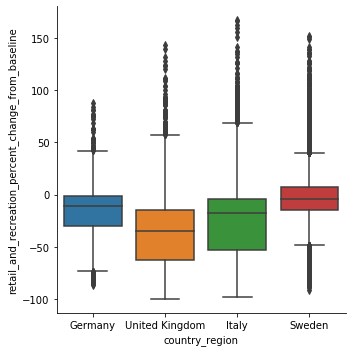

In [43]:
# Differences in mobility trends across countries (for selected countries) 
# We use the DataFrame gcmr_df_countries we already created
sns.catplot(x="country_region", 
            y="retail_and_recreation_percent_change_from_baseline", 
            kind="box",
            data=gcmr_df_countries)

### 7.1 Wide and Long Data Format

[Reshaping data](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png" title='Pandas DataFrame' width="600" height="300"/>

### 7.2 Visualise your data across mobility categories



In [44]:
# Visualise across all six mobility variables

# Create an object (mobility_variables) containing the names of the six mobility variables
mobility_variables = ['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

gcmr_df_countries_long = pd.melt(gcmr_df_countries, id_vars=['country_region','sub_region_1', 'date'], 
                                value_vars=mobility_variables)

In [45]:
# Display the first five rows
gcmr_df_countries_long.head()

,country_region,sub_region_1,date,variable,value
0,Germany,NaN,2020-02-15,retail_and_recreation_percent_change_from_base...,6.0
1,Germany,NaN,2020-02-16,retail_and_recreation_percent_change_from_base...,7.0
2,Germany,NaN,2020-02-17,retail_and_recreation_percent_change_from_base...,2.0
3,Germany,NaN,2020-02-18,retail_and_recreation_percent_change_from_base...,2.0
4,Germany,NaN,2020-02-19,retail_and_recreation_percent_change_from_base...,3.0


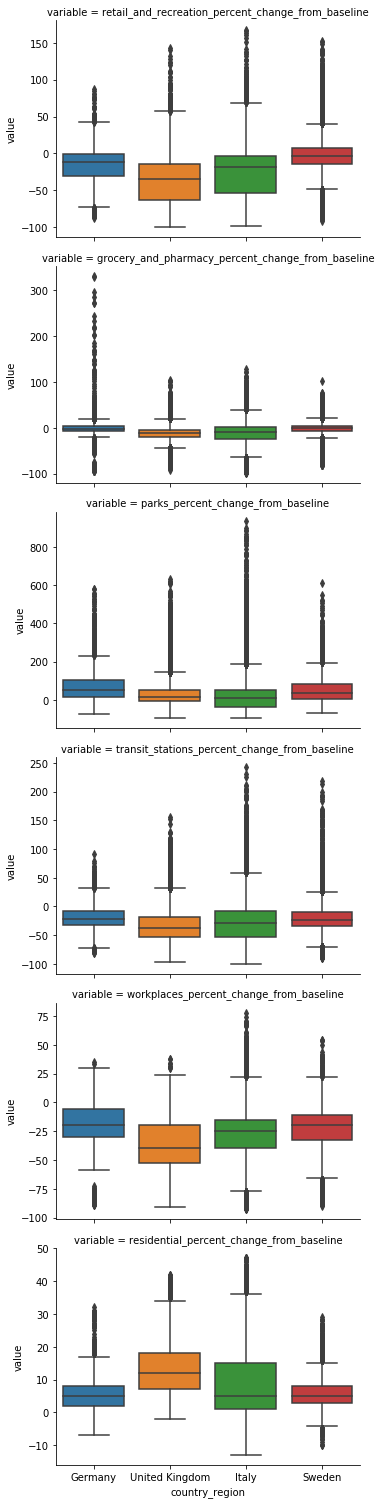

In [46]:
# Differences in mobility trends across mobility variables and countries (for selected countries)

g = sns.catplot(x="country_region", y="value", row="variable", kind="box", 
                # control plot size
                height=3.5, aspect=1.5,
                # set different y axes for each plot
                sharey=False,
                data=gcmr_df_countries_long)

### 7.3 Visualise your data over time
Mobility trends in the United Kingdom across mobility categories.

In [47]:
# Extract month from year-month-date
# Format datetime as Month-Year
gcmr_df_countries_long.loc[:,'date'] = pd.to_datetime(gcmr_df_countries_long.loc[:,'date'])
gcmr_df_countries_long['Month_Year'] = gcmr_df_countries_long['date'].dt.strftime('%b-%Y')

# The output is a datatime object
gcmr_df_countries_long['Month_Year'].head()

0    Feb-2020
1    Feb-2020
2    Feb-2020
3    Feb-2020
4    Feb-2020
Name: Month_Year, dtype: object

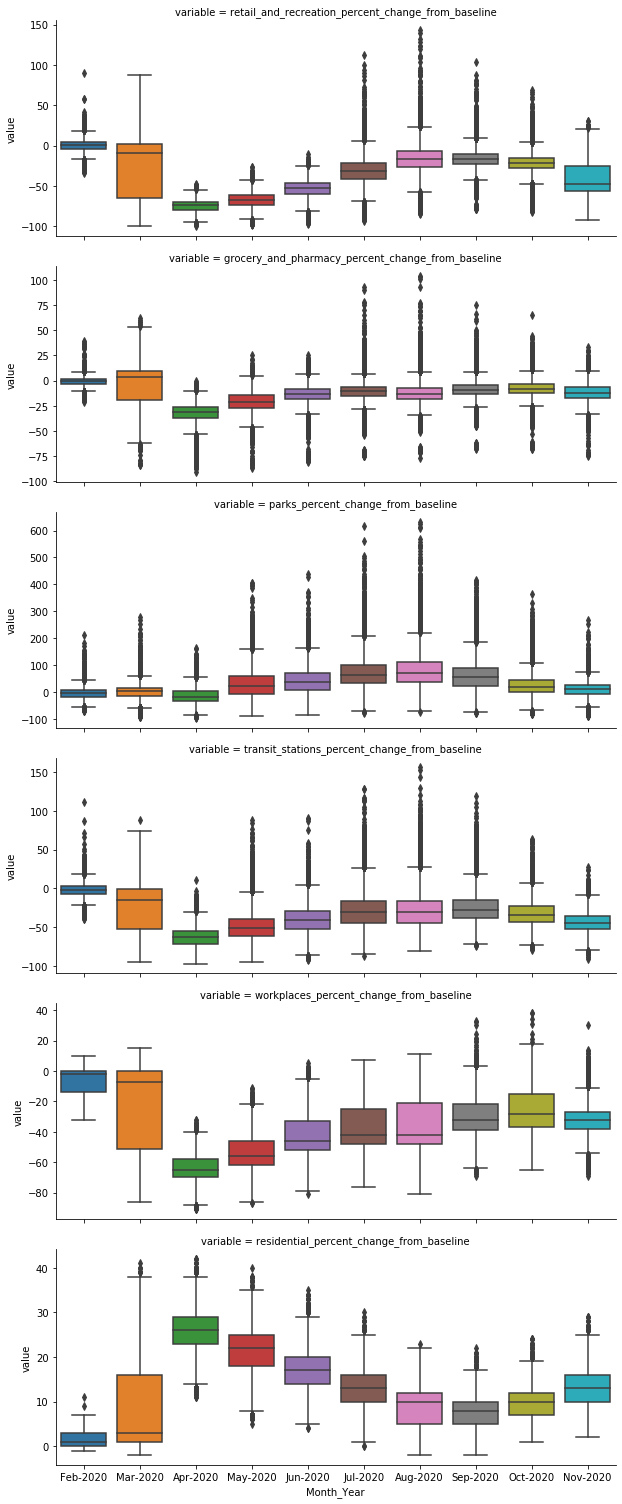

In [48]:
# Select only data about the UK 
gcmr_df_countries_long_UK = gcmr_df_countries_long[(gcmr_df_countries_long['country_region'] == 'United Kingdom')]


# Plot mobility trends in the UK over months and across the six mobility categories 
g = sns.catplot(x="Month_Year", y="value", row="variable",
                kind="box", height=3.5, aspect=2.5,
                sharey=False,
                data=gcmr_df_countries_long_UK)

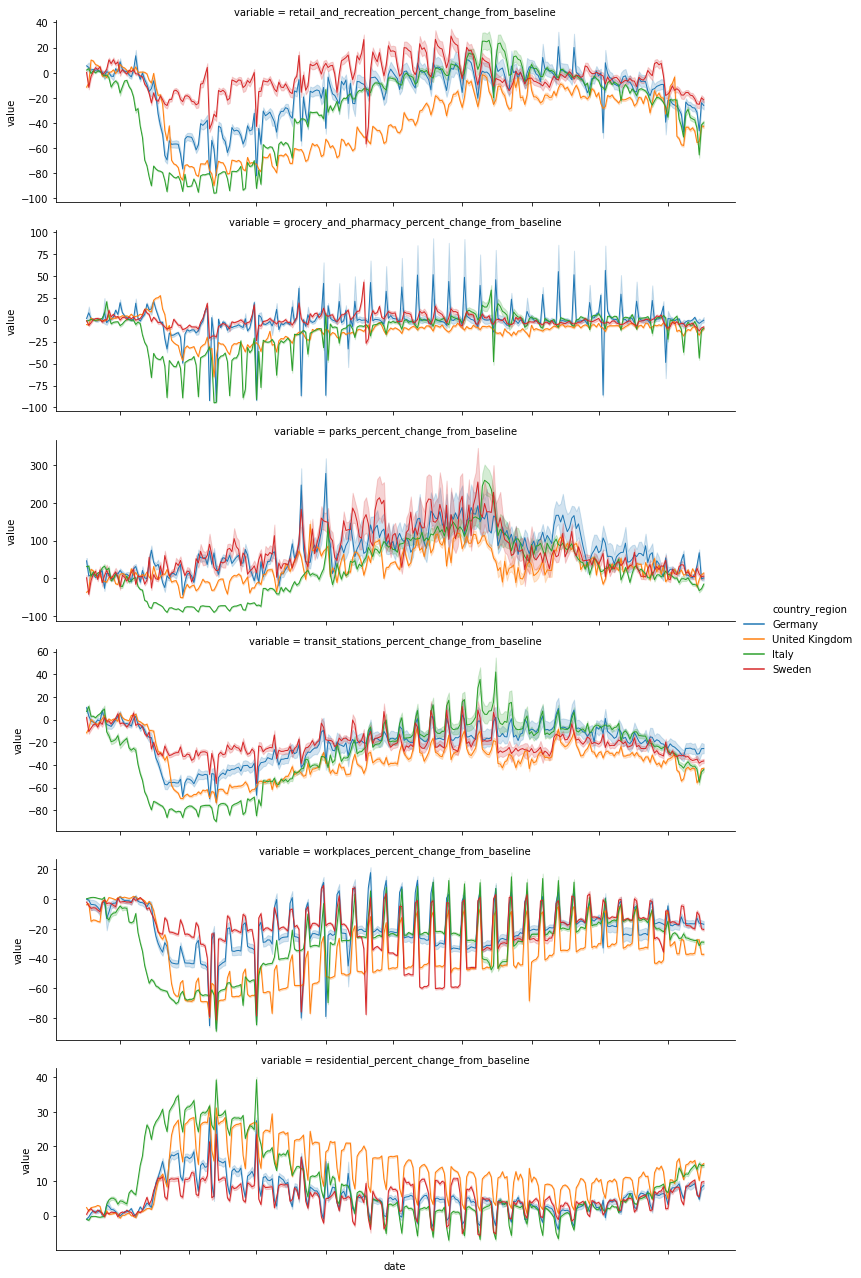

In [49]:
# Visualise daily mobility trends across mobility categories and countries of interest 

gcmr_df_countries_long['date'] = pd.to_datetime(gcmr_df_countries_long['date'])

fig=sns.relplot(x="date",
                y="value",
                hue="country_region",
                col="variable", col_wrap=1,
                height=3, aspect=3.5, linewidth=1,
                facet_kws={'sharey': False, 'sharex': True},
                kind="line", data=gcmr_df_countries_long)
fig.set_xticklabels(rotation=90)

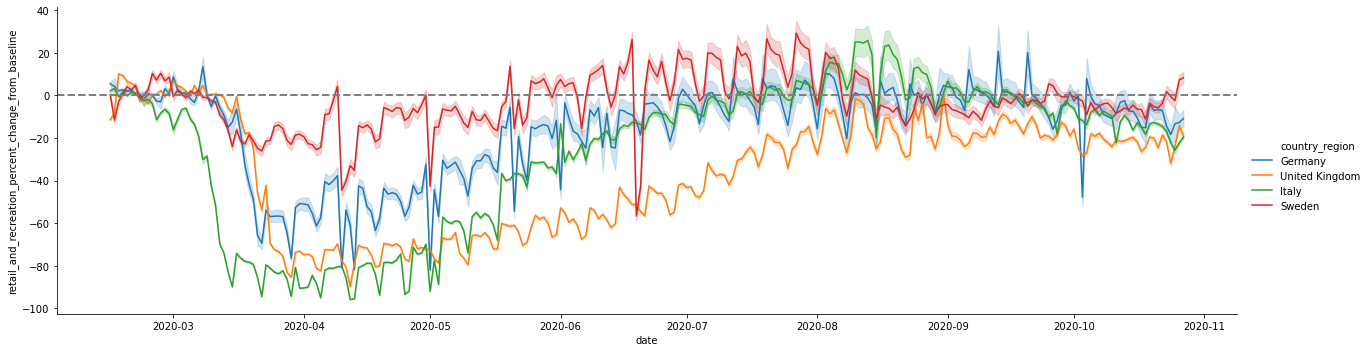

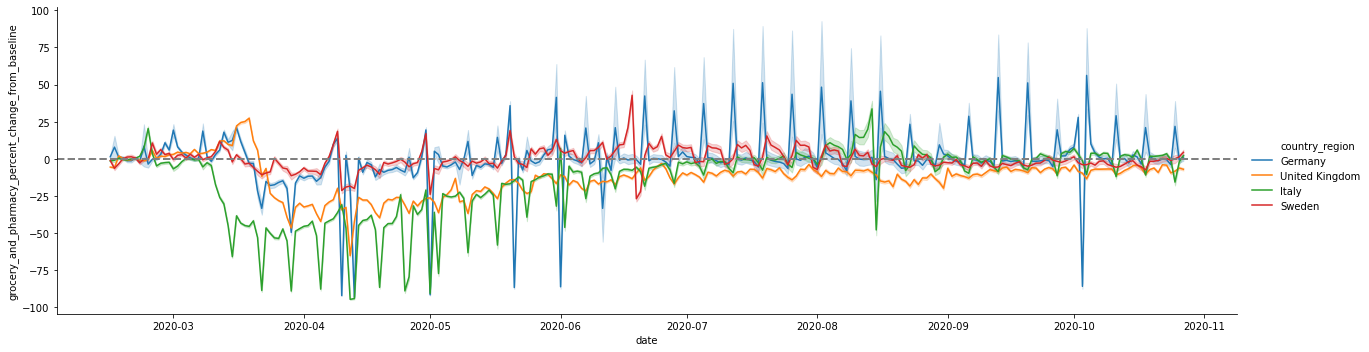

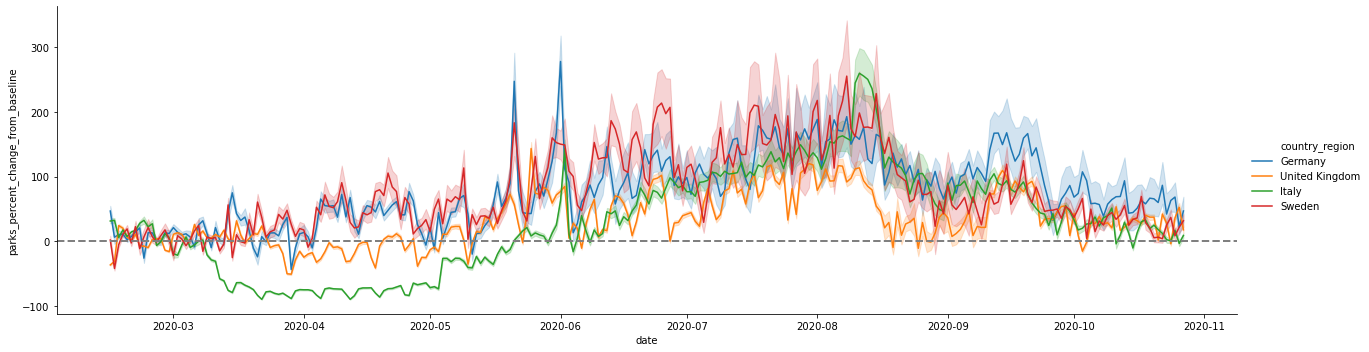

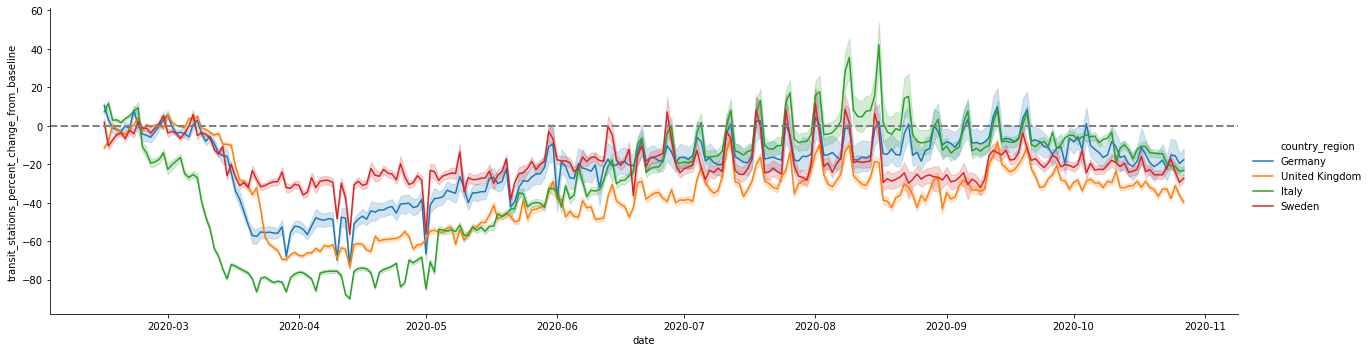

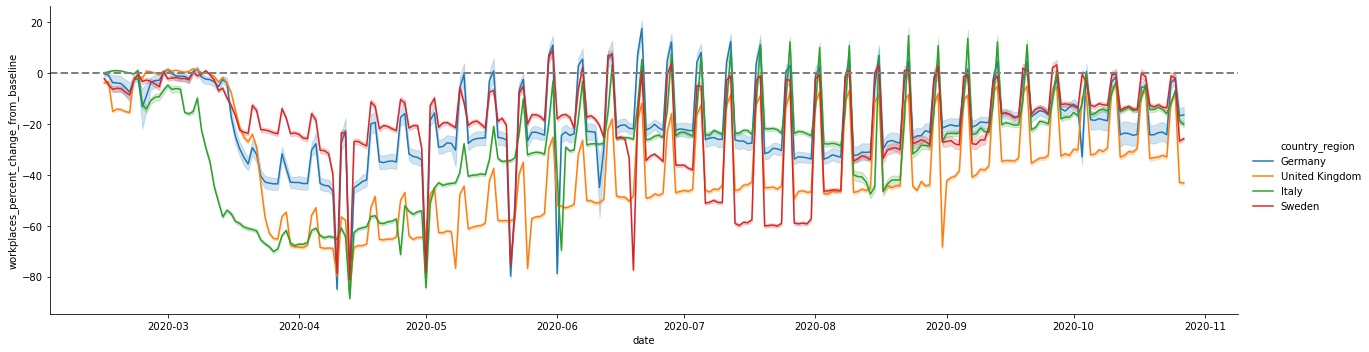

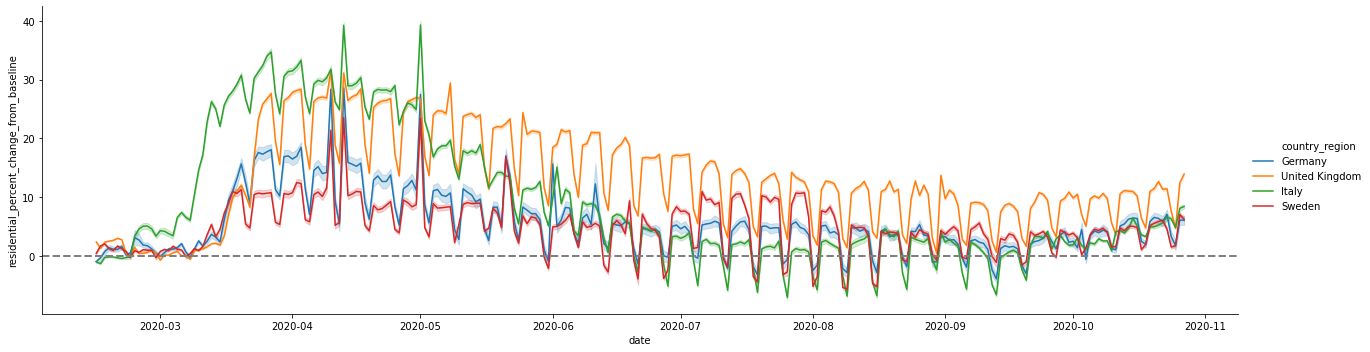

In [48]:
# Alternatively, the 'wide' format of the data and 'for' loop can be used to create a plot similar to the one above
gcmr_df_countries.loc[:,'date'] = pd.to_datetime(gcmr_df_countries.loc[:,'date'])

for group in mobility_variables:
    sns.relplot(x="date", height=5, aspect=3.5,y=group,hue="country_region", kind="line", data=gcmr_df_countries)
    plt.axhline(y=0, color='gray',linestyle='--', lw=2)

### 7.4 Mobility trends in Essex, United Kingdom

retail_and_recreation_percent_change_from_baseline


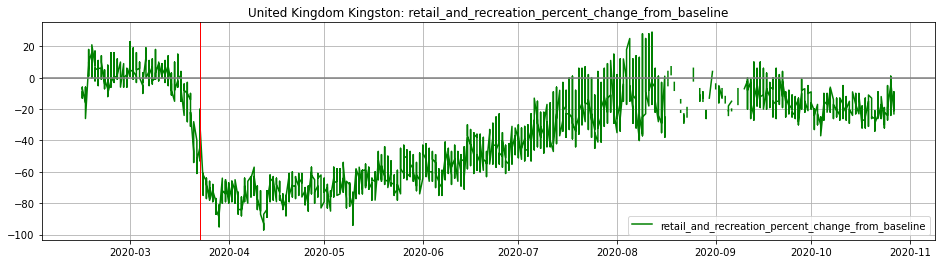

grocery_and_pharmacy_percent_change_from_baseline


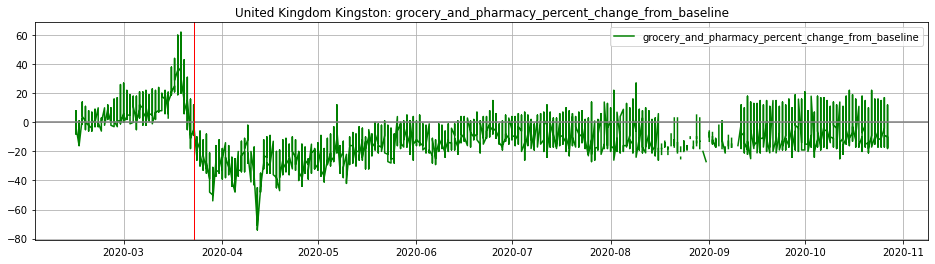

parks_percent_change_from_baseline


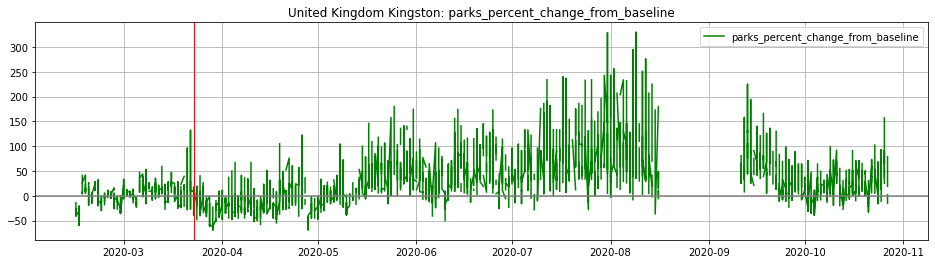

transit_stations_percent_change_from_baseline


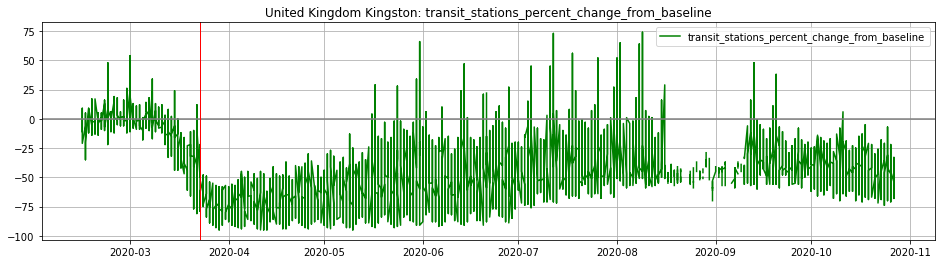

workplaces_percent_change_from_baseline


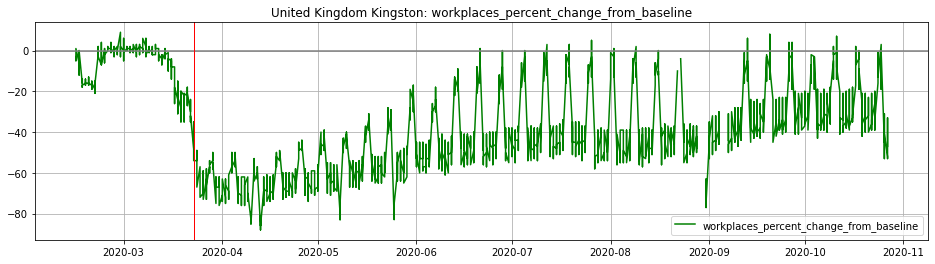

residential_percent_change_from_baseline


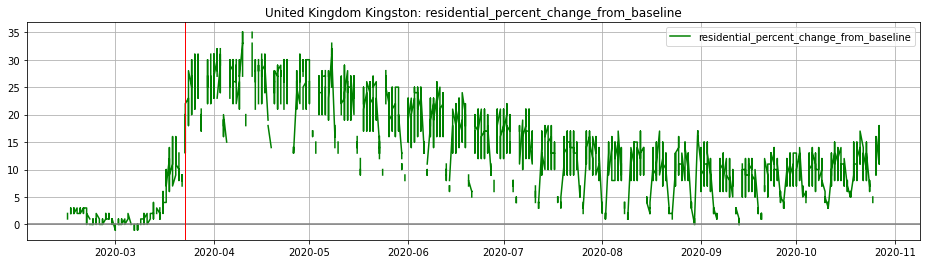

In [49]:
# Reuse the 'gcmr_df_country_UK_county_Essex' DataFrame we already created
# gcmr_df_country_UK_county_Essex = gcmr_df[(gcmr_df['country_region'] == 'United Kingdom') & 
#                                 (gcmr_df['sub_region_1']=='Essex')]

country = 'United Kingdom'
county = 'Kingston'

gcmr_df_country_UK_county_Essex.loc[:,'date'] = pd.to_datetime(gcmr_df_country_UK_county_Essex.loc[:,'date'])
gcmr_df_country_UK_county_Essex = gcmr_df_country_UK_county_Essex.sort_values('date', ascending=True)
 
# let's plot all time series for this region
for var in mobility_variables:
    print(var)
     
    fig, ax = plt.subplots(figsize=(16, 4))
    plt.plot(gcmr_df_country_UK_county_Essex['date'], gcmr_df_country_UK_county_Essex[var], label=var,color='green')
    ax.axhline(y=0, color='gray')
    ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='-', lw=1)
    plt.title(country + ' '+ county + ': ' + var)
    plt.legend(loc='best') 
    plt.grid()
    plt.show()   

## Acknowledgements
* Wes McKinney. 2017. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython.
* Daniel Chen. 2017. Pandas for Everyone: Python Data Analysis.
* Manuel Amunategui. 2020. COVID-19 Community Mobility Reports From Google and Apple - Available to All - Explore with Python. 